# Introduction

Orthogonal Matching Pursuit (OMP) is a method for recovering a sparse signal from a noisy measurement encoded with a dictionary. In this lab, we will use scikit-learn to implement OMP to recover a sparse signal from a noisy measurement.

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

# Generate the Data

In [2]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)
X = X.T

(idx,) = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# Plot the Sparse Signal

<StemContainer object of 3 artists>

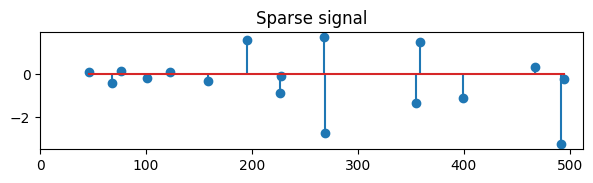

In [3]:
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

# Plot the Noise-Free Reconstruction

<StemContainer object of 3 artists>

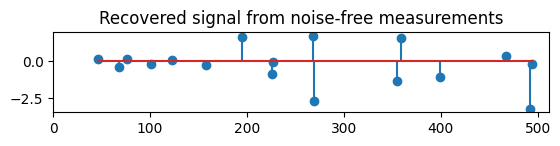

In [4]:
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# Plot the Noisy Reconstruction

<StemContainer object of 3 artists>

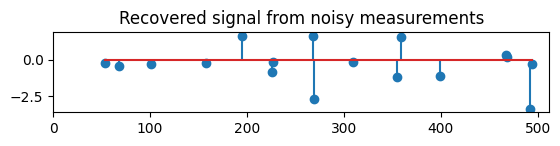

In [5]:
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

# Plot the Noisy Reconstruction with Number of Non-zeros Set by CV

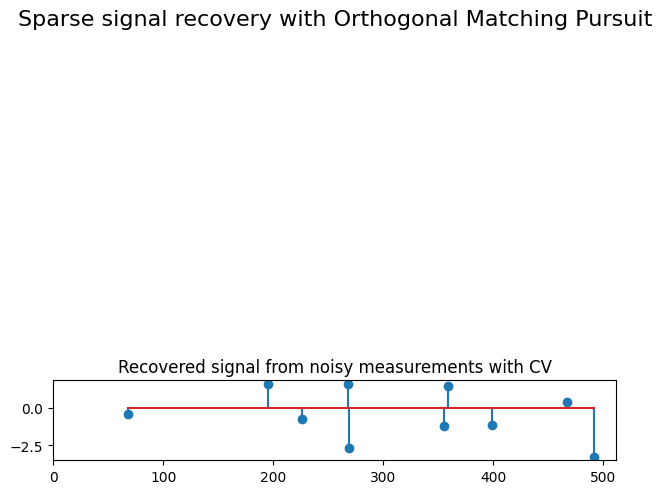

In [6]:
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()

# Summary

In this lab, we have learned how to use Orthogonal Matching Pursuit (OMP) to recover a sparse signal from a noisy measurement encoded with a dictionary. We have used scikit-learn to implement OMP and generate a sparse coded signal. We have also plotted the sparse signal, the noise-free reconstruction, the noisy reconstruction, and the noisy reconstruction with the number of non-zeros set by CV.